In [43]:
#Pré-processamento
import pandas as pd 
import numpy as np 

# Visualização
import matplotlib.pyplot as plt 
import seaborn as sb 
import plotly.figure_factory as ff

# Modelagem
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.decomposition import PCA

In [2]:
dataframe = pd.read_csv('aug_train.csv', decimal = ',', sep = ',', encoding = 'latin1')
dataframe

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.92,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.7759999999999999,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,NaN,NaN,1,42,1.0
19154,31398,city_103,0.92,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,NaN,NaN,4,52,1.0
19155,24576,city_103,0.92,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,4,44,0.0
19156,5756,city_65,0.802,Male,Has relevent experience,no_enrollment,High School,NaN,<1,500-999,Pvt Ltd,2,97,0.0


# Analise Exploratoria

In [3]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   enrollee_id             19158 non-null  int64 
 1   city                    19158 non-null  object
 2   city_development_index  19158 non-null  object
 3   gender                  14650 non-null  object
 4   relevent_experience     19158 non-null  object
 5   enrolled_university     18772 non-null  object
 6   education_level         18698 non-null  object
 7   major_discipline        16345 non-null  object
 8   experience              19093 non-null  object
 9   company_size            13220 non-null  object
 10  company_type            13018 non-null  object
 11  last_new_job            18735 non-null  object
 12  training_hours          19158 non-null  int64 
 13  target                  19158 non-null  object
dtypes: int64(2), object(12)
memory usage: 2.0+ MB


In [4]:
dataframe_clean = dataframe.dropna()

In [5]:
dataframe_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8955 entries, 1 to 19155
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   enrollee_id             8955 non-null   int64 
 1   city                    8955 non-null   object
 2   city_development_index  8955 non-null   object
 3   gender                  8955 non-null   object
 4   relevent_experience     8955 non-null   object
 5   enrolled_university     8955 non-null   object
 6   education_level         8955 non-null   object
 7   major_discipline        8955 non-null   object
 8   experience              8955 non-null   object
 9   company_size            8955 non-null   object
 10  company_type            8955 non-null   object
 11  last_new_job            8955 non-null   object
 12  training_hours          8955 non-null   int64 
 13  target                  8955 non-null   object
dtypes: int64(2), object(12)
memory usage: 1.0+ MB


In [6]:
dataframe_clean.drop(columns = ['enrollee_id', 'city'], inplace = True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [7]:
dataframe_clean.city_development_index = dataframe_clean.city_development_index.astype('float')
dataframe_clean.target = dataframe_clean.target.astype('float')

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [8]:
dataframe_clean.describe()

,city_development_index,training_hours,target
count,8955.000000,8955.000000,8955.000000
mean,0.844570,65.074930,0.165606
std,0.116178,60.235087,0.371747
min,0.448000,1.000000,0.000000
25%,0.794000,23.000000,0.000000
50%,0.910000,47.000000,0.000000
75%,0.920000,88.000000,0.000000
max,0.949000,336.000000,1.000000


In [9]:
dataframe_clean.city_development_index.skew()

-1.269173327066221

In [10]:
dataframe_clean.training_hours.skew()

1.849579036406782

In [11]:
dataframe_clean.target.skew()

1.799442864474955

<ipython-input-17-eb034db833ec>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_xticklabels(feature, rotation=60)


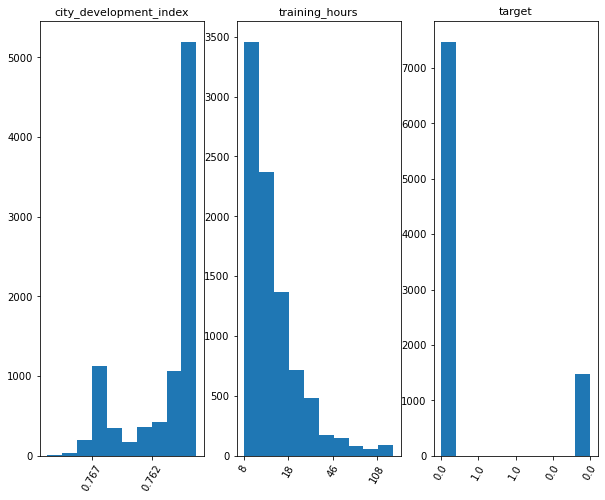

In [17]:
fig, axs = plt.subplots(1, 3, figsize = (10, 8))
index = 0
columns = ['city_development_index', 'training_hours', 'target']

for i in range(3):
        feature = dataframe_clean[columns[index]]
        axs[i].hist(feature)
        axs[i].set_title(columns[index], size = 11)
        axs[i].set_xticklabels(feature, rotation=60)

        index = index + 1
plt.savefig('hist_numeric.png')

In [18]:
columns = dataframe_clean.columns.to_list()
columns.pop(0)
columns.pop(-1)
columns.pop(-1)
columns

['gender',
 'relevent_experience',
 'enrolled_university',
 'education_level',
 'major_discipline',
 'experience',
 'company_size',
 'company_type',
 'last_new_job']

<ipython-input-22-b73c646ac7d5>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i][j].set_xticklabels(feature.value_counts().index, rotation=45)


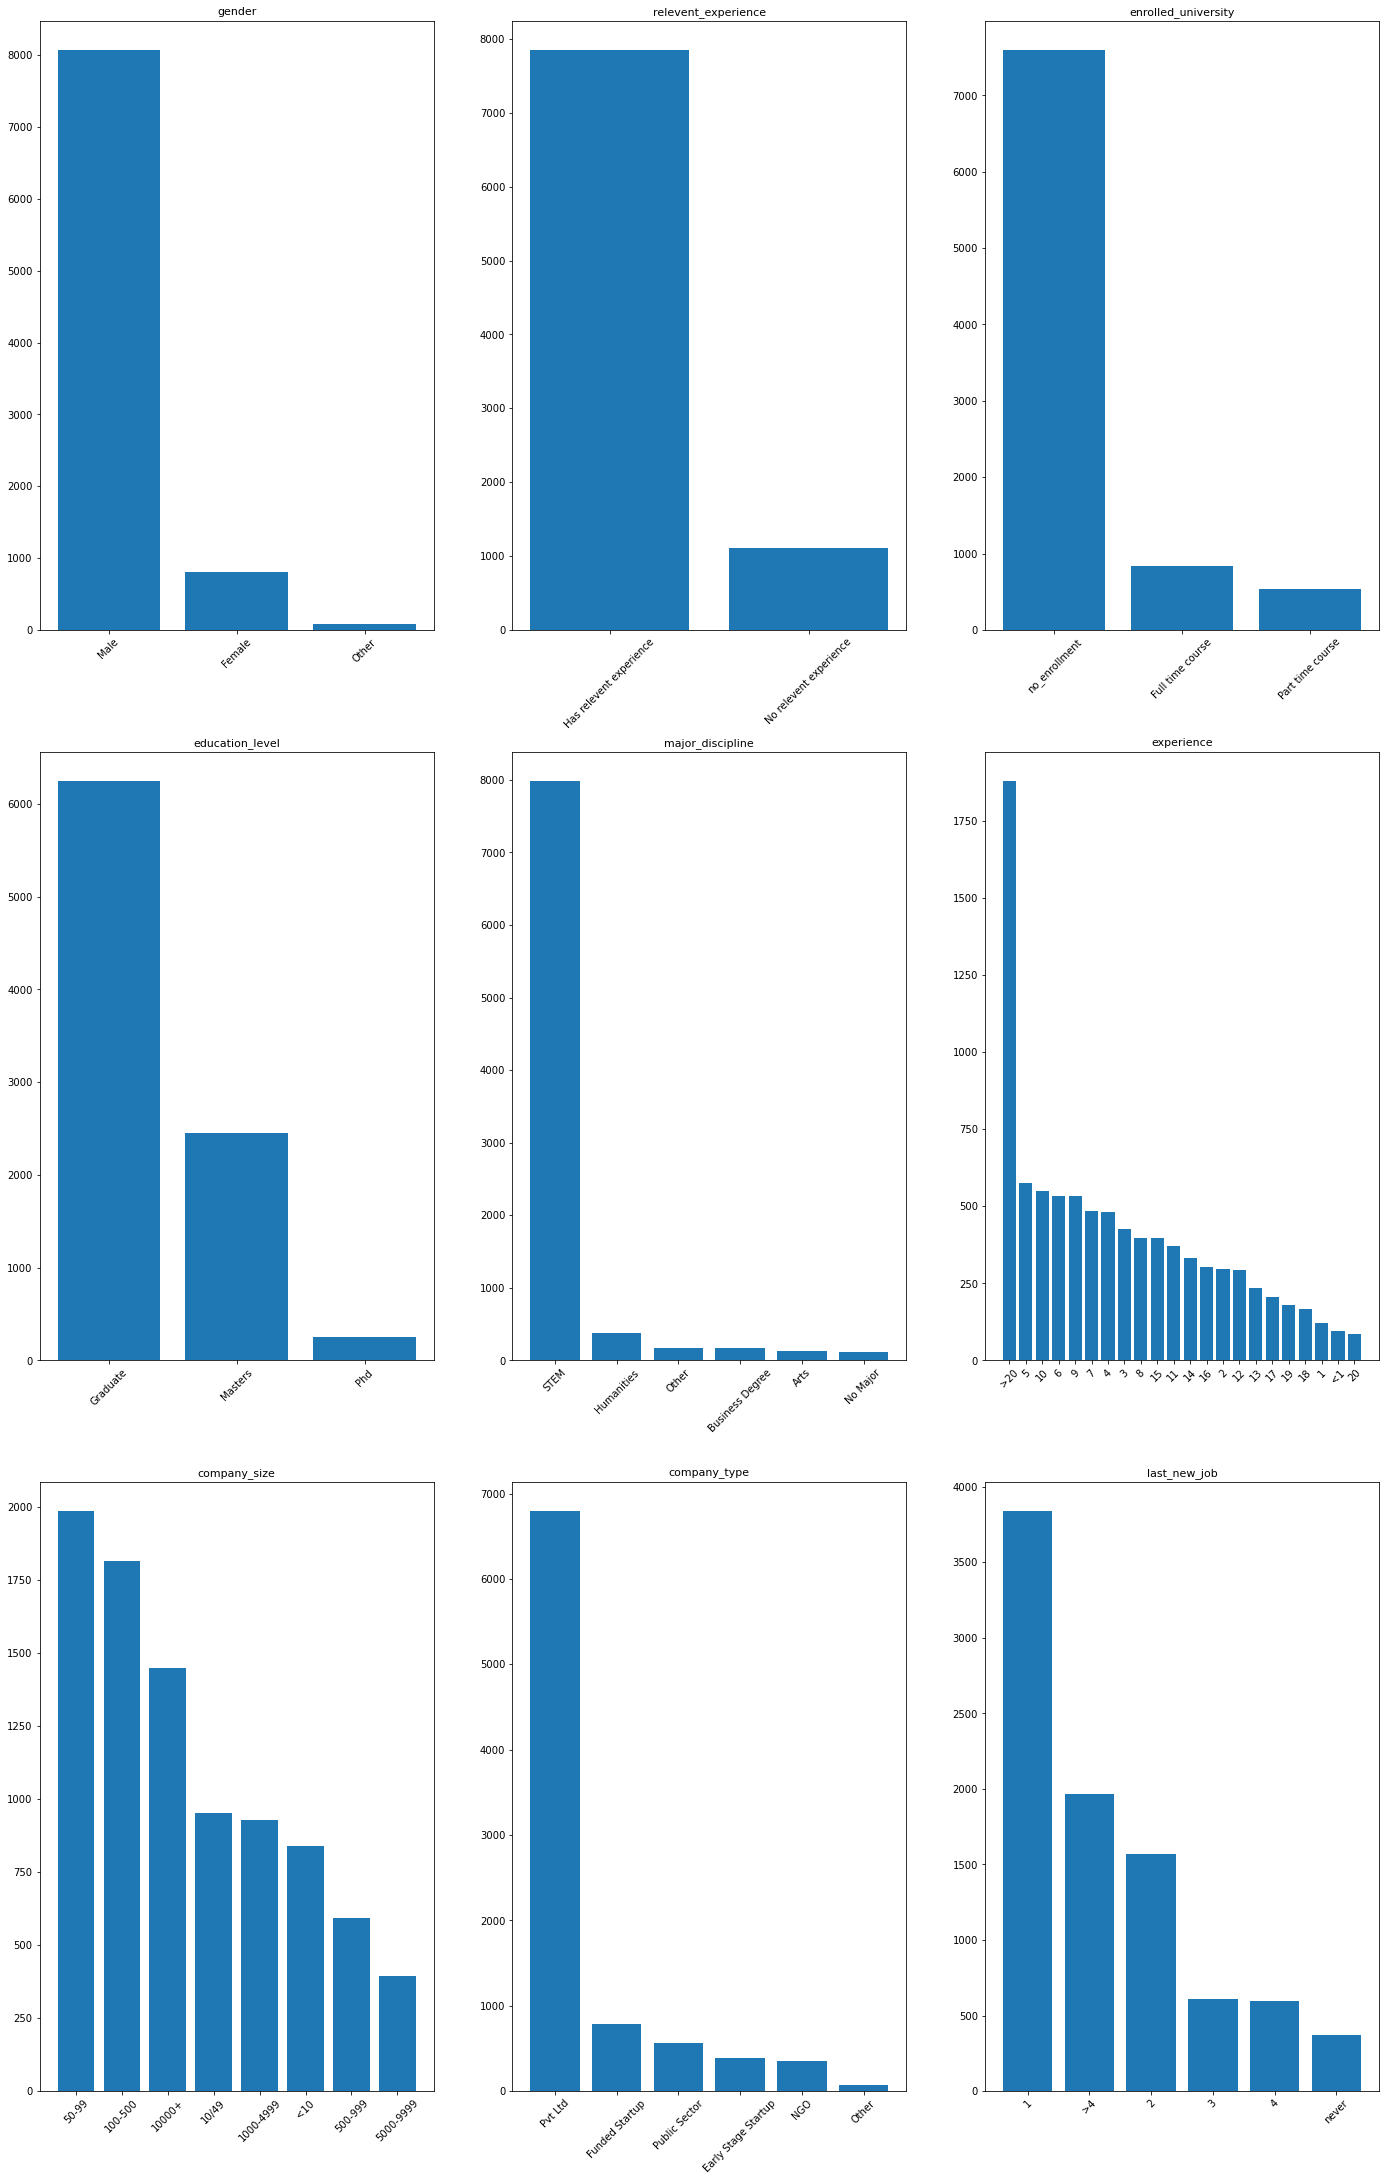

In [22]:
fig, axs = plt.subplots(3, 3, figsize = (24, 10))
index = 0

plt.subplots_adjust(top=3)

for i in range(3):
  for j in range(3):
          feature = dataframe_clean[columns[index]]
          axs[i][j].bar(feature.value_counts().index, feature.value_counts().values)
          axs[i][j].set_title(columns[index], size = 11)
          axs[i][j].set_xticklabels(feature.value_counts().index, rotation=45)

          index = index + 1

fig.savefig('bar.png',  bbox_inches='tight')

In [23]:
dataframe_gd = pd.get_dummies(dataframe_clean, columns = ['gender', 'relevent_experience', 'enrolled_university', 'education_level', 'major_discipline', 'experience', 'company_size', 'company_type', 'last_new_job'])
dataframe_gd

,city_development_index,training_hours,target,gender_Female,gender_Male,gender_Other,relevent_experience_Has relevent experience,relevent_experience_No relevent experience,enrolled_university_Full time course,enrolled_university_Part time course,...,company_type_NGO,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd,last_new_job_1,last_new_job_2,last_new_job_3,last_new_job_4,last_new_job_>4,last_new_job_never
1,0.776,47,0.0,0,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
4,0.767,8,0.0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
7,0.762,18,1.0,0,1,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
8,0.920,46,1.0,0,1,0,1,0,0,0,...,0,0,0,1,1,0,0,0,0,0
11,0.920,108,0.0,0,1,0,1,0,0,0,...,0,0,0,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19147,0.624,52,1.0,0,1,0,0,1,1,0,...,0,0,0,1,1,0,0,0,0,0
19149,0.920,36,1.0,0,1,0,1,0,0,0,...,0,0,0,1,1,0,0,0,0,0
19150,0.920,23,0.0,1,0,0,1,0,0,0,...,0,0,1,0,0,0,1,0,0,0
19152,0.920,25,0.0,1,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [24]:
dataframe_gd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8955 entries, 1 to 19155
Data columns (total 62 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   city_development_index                       8955 non-null   float64
 1   training_hours                               8955 non-null   int64  
 2   target                                       8955 non-null   float64
 3   gender_Female                                8955 non-null   uint8  
 4   gender_Male                                  8955 non-null   uint8  
 5   gender_Other                                 8955 non-null   uint8  
 6   relevent_experience_Has relevent experience  8955 non-null   uint8  
 7   relevent_experience_No relevent experience   8955 non-null   uint8  
 8   enrolled_university_Full time course         8955 non-null   uint8  
 9   enrolled_university_Part time course         8955 non-null   uint8  
 10 

# FEATURE ENGINEERING

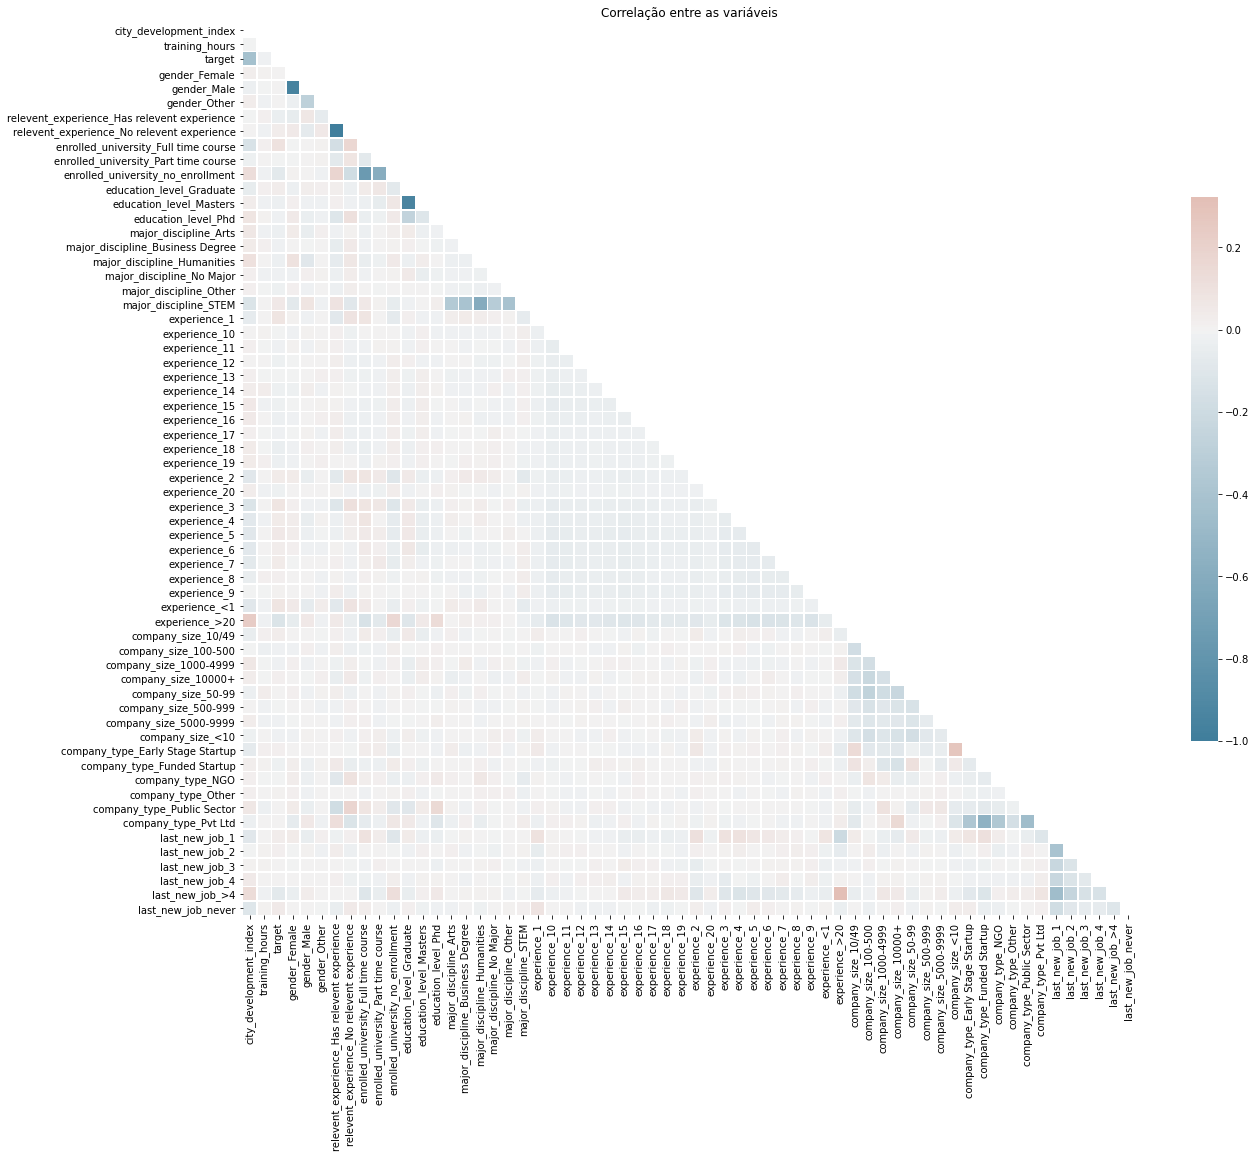

In [25]:
corr = dataframe_gd.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(20, 20))
cmap = sb.diverging_palette(230, 20, as_cmap=True)
sb.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Correlação entre as variáveis')
plt.show()
f.savefig('corr.png',  bbox_inches='tight')

# Undersampling

Class 0: 7472
Class 1: 1483
Proportion: 5.04 : 1


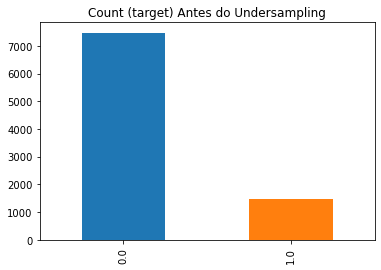

In [26]:
target_count = dataframe_gd['target'].value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')
target_count.plot(kind='bar', title='Count (target) Antes do Undersampling',color = ['#1F77B4', '#FF7F0E']);
plt.savefig('antes_undersampling.png')

Random under-sampling:
1.0    1483
0.0    1483
Name: target, dtype: int64


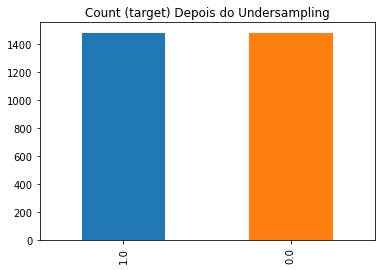

In [27]:
# CONTAR CLASSES
count_class_0, count_class_1 = dataframe_gd['target'].value_counts()
# Divide by class
df_class_0 = dataframe_gd[dataframe_gd['target'] == 0]
df_class_1 = dataframe_gd[dataframe_gd['target'] == 1]
df_class_0_under = df_class_0.sample(count_class_1)
dataframe_gd = pd.concat([df_class_0_under, df_class_1], axis = 0)
print('Random under-sampling:')
print(dataframe_gd['target'].value_counts())
dataframe_gd['target'].value_counts().plot(kind='bar', title='Count (target) Depois do Undersampling',color = ['#1F77B4', '#FF7F0E']);
plt.savefig('depois_undersampling.png')

In [28]:
features = dataframe_gd.drop(columns=['target'])

In [29]:
target = dataframe_gd['target']

In [30]:
scaler = StandardScaler()
scaler.fit(features)
features = scaler.transform(features)

In [31]:
x_train, x_test, y_train, y_test = train_test_split(features, target, 
                                                    test_size = 0.3, 
                                                    random_state = 1234, 
                                                    stratify = target)

# Modelagem de Classificação - Modelo Linear - LDA

In [32]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [33]:
clf = LinearDiscriminantAnalysis()

In [34]:
clf.fit(x_train, y_train)

LinearDiscriminantAnalysis()

In [35]:
previsoes = clf.predict(x_test)

In [36]:
pd.Series(previsoes).value_counts()

0.0    491
1.0    399
dtype: int64

In [37]:
y_test.value_counts()

0.0    445
1.0    445
Name: target, dtype: int64

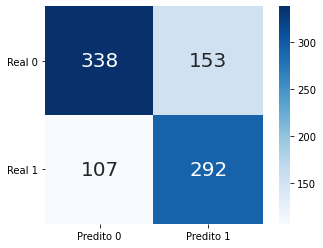

In [40]:
cf_matrix = confusion_matrix(previsoes, y_test)
sb.heatmap(cf_matrix, annot=True,
            square=True, xticklabels=['Predito 0','Predito 1'],
            yticklabels=['Real 0','Real 1'],
            annot_kws={"fontsize":20}, fmt='g', cmap='Blues')
plt.yticks(rotation=0)
plt.savefig('confusao_LDA.png')

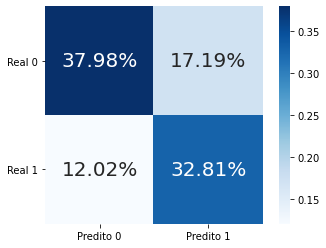

In [42]:
sb.heatmap(cf_matrix/np.sum(cf_matrix), annot=True,
            square=True, xticklabels=['Predito 0','Predito 1'],
            yticklabels=['Real 0','Real 1'],annot_kws={"fontsize":20}, fmt='.2%', cmap='Blues')
plt.yticks(rotation=0)
plt.savefig('cofusapp_%_LDA.png')

In [48]:
from sklearn.metrics import log_loss, accuracy_score, f1_score, precision_score, recall_score, classification_report

def metricas(y_true, y_pred):
    ac = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    ps = precision_score(y_true, y_pred)
    rc = recall_score(y_true, y_pred)

    score = ['Score', round(ac,4), round(ps,4), round(rc,4), round(f1,4)]

    colunas = ['Métricas', 'Acurácia', 'Precisão', 'Recall', 'F1']
    fig = ff.create_table([colunas,  score], height_constant=20)    
    return fig

In [52]:
metricas(y_test, previsoes)

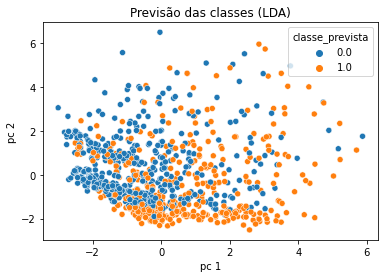

In [53]:
pca = PCA(n_components = 2, random_state=123)
principalComponents = pca.fit_transform(x_test)
principalDf = pd.DataFrame(data = principalComponents, 
                           columns = ['pc 1', 'pc 2'])

principalDf['classe_prevista'] = previsoes

sb.scatterplot(x = 'pc 1', y = 'pc 2', data = principalDf, hue = 'classe_prevista')
plt.title('Previsão das classes (LDA)');
plt.savefig('previsao_LDA.png')

# Modelagem de Classificação - Modelo Não Linear

In [54]:
x = dataframe_gd[(i for i in dataframe_gd.columns if i != 'target')]
y = dataframe_gd['target']

kf = KFold(n_splits=5, random_state=1234)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning:

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.



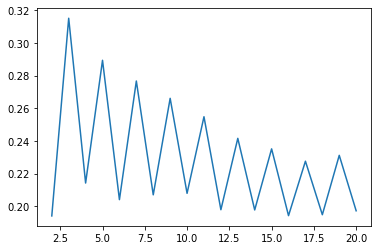

In [55]:
f1_arr = []
for neigh in range(2, 21, 1):
    knn = KNeighborsClassifier(n_neighbors = neigh)
    scores = cross_val_score(knn, x, y, cv = kf, scoring = 'f1')
    f1_arr.append(scores.mean())
plt.plot(range(2, 21, 1), f1_arr)
plt.savefig('knn_validacao_cruzada.png')

In [56]:
neigh = KNeighborsClassifier(n_neighbors = 3)
neigh.fit(x_train, y_train)
previsoes = neigh.predict(x_test)

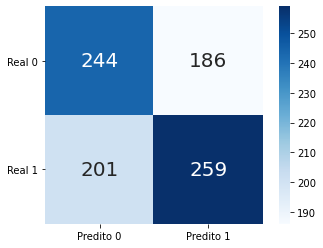

In [59]:
cf_matrix = confusion_matrix(previsoes, y_test)
sb.heatmap(cf_matrix, annot=True,
            square=True, xticklabels=['Predito 0','Predito 1'],
            yticklabels=['Real 0','Real 1'],
            annot_kws={"fontsize":20}, fmt='g', cmap='Blues')
plt.yticks(rotation=0)
plt.savefig('cofusapp_KNN.png')

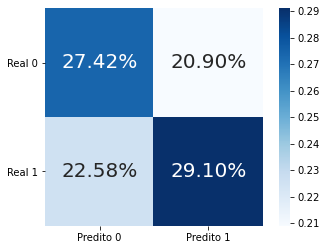

In [58]:
sb.heatmap(cf_matrix/np.sum(cf_matrix), annot=True,
            square=True, xticklabels=['Predito 0','Predito 1'],
            yticklabels=['Real 0','Real 1'],annot_kws={"fontsize":20}, fmt='.2%', cmap='Blues')
plt.yticks(rotation=0)
plt.savefig('cofusapp_%_LDA.png')
plt.savefig('cofusapp_%_KNN.png')

In [60]:
metricas(y_test, previsoes)

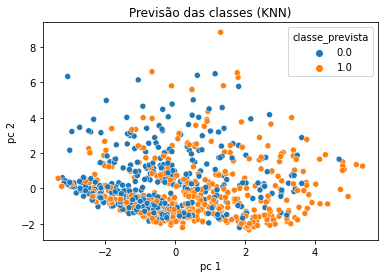

In [120]:
pca = PCA(n_components = 2, random_state=123)
principalComponents = pca.fit_transform(x_test)
principalDf = pd.DataFrame(data = principalComponents, 
                           columns = ['pc 1', 'pc 2'])

principalDf['classe_prevista'] = previsoes

sb.scatterplot(x = 'pc 1', y = 'pc 2', data = principalDf, hue = 'classe_prevista')
plt.title('Previsão das classes (KNN)');
plt.savefig('previsao_KNN.png')